Problem 4 (a)

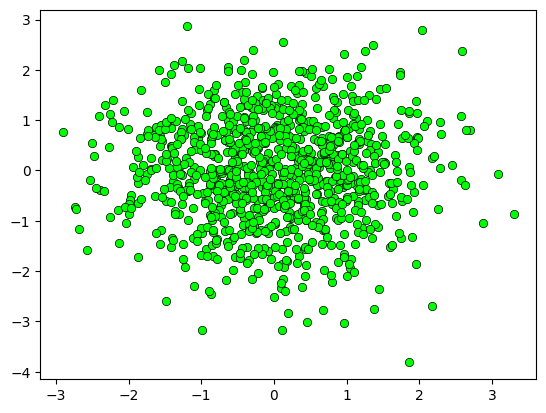

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

random_seed=1000
cov = np.array([[1,0],[0,1]])
mean = np.array([0,0])
distr = multivariate_normal(cov = cov, mean = mean, seed = random_seed)
data = distr.rvs(size = 1000)
plt.plot(data[:,0],data[:,1], 'o', c='lime', markeredgewidth = 0.5, markeredgecolor = 'black')
plt.show()

(b)

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pylab as py
import time

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
   
def show_clusters(kmeans,X):
    y=kmeans.predict(X)
    fig=py.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(X[:,0],X[:,1],'o',color='blue')
    for i in range(2):
        ec=[0.,0.,0.,1.]
        ec[i]=1.
        ax.plot(X[y==i,0],X[y==i,1],'o',markerfacecolor=(1.,1.,1.,0), markeredgecolor=ec,markersize=10)
    ax.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'o',color='black',markersize=15)
    py.show()

In [3]:
def run_kmeans_stepwise(data,init_centers,kpp):
    c=np.array([[-1,0],[0,0], [1, 0]])
    if kpp==True:
        kmeans=KMeans(n_clusters=2,n_init=1,max_iter=1)
        kmeans.fit(X)
        init_centers=kmeans.cluster_centers_
    

    num_iters=10
    oldscore=-1
    for i in range(num_iters):
        kmeans=KMeans(n_clusters=3,init=init_centers,n_init=1,max_iter=1)
        kmeans.fit(data)
        newscore=-kmeans.score(data)
        print('step',i,'score',newscore)
        print('code book',kmeans.cluster_centers_)
        init_centers=kmeans.cluster_centers_
        if newscore==oldscore:
            print('Converged')
            show_clusters(kmeans,data)
            break
        else:
            oldscore=newscore
        c=kmeans.cluster_centers_
        if i==9:
            show_clusters(kmeans,data)
    return c

step 0 score 1214.791645041469
code book [[-1.15057707e+00 -1.27642968e-02]
 [-9.55096900e-05 -4.56802359e-02]
 [ 1.16818378e+00  3.87317084e-02]]
step 1 score 1206.6842049169613
code book [[-1.21205127  0.00964158]
 [-0.01229501 -0.09188197]
 [ 1.20412404  0.09098769]]
step 2 score 1182.50417769683
code book [[-1.24082499  0.06834625]
 [-0.01365317 -0.18296459]
 [ 1.21350046  0.18637785]]
step 3 score 1079.642126515763
code book [[-1.2185809   0.24518008]
 [-0.01339228 -0.40284426]
 [ 1.16653911  0.34568425]]
step 4 score 945.8613462091523
code book [[-1.10596861e+00  4.49333861e-01]
 [ 2.17027638e-04 -7.63570155e-01]
 [ 1.04017755e+00  5.20350883e-01]]
step 5 score 919.1144093232724
code book [[-1.01611326  0.50007678]
 [ 0.02103099 -0.95692055]
 [ 0.96159777  0.58032799]]
step 6 score 913.5467680730924
code book [[-0.97333387  0.48188691]
 [ 0.01668165 -1.04338656]
 [ 0.93686082  0.55604508]]
step 7 score 911.0924577842168
code book [[-0.94749991  0.46088614]
 [ 0.01452565 -1.103536

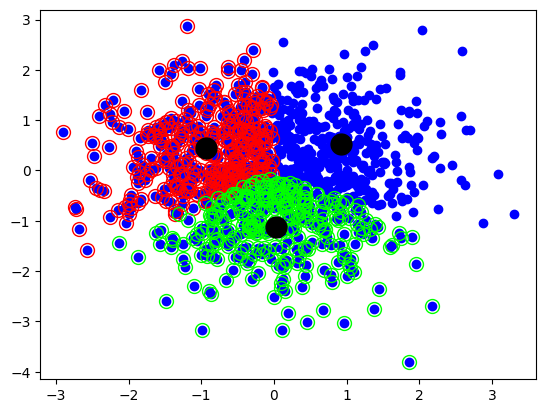

In [4]:
init_centers=np.array([[-1,0],[0,0], [1, 0]])

#run_kmeans_stepwise(Xg,Yg,init_centers,kpp=True)

c = run_kmeans_stepwise(data,init_centers,kpp=False)

In [5]:
init_centers=np.array([[-1,0],[0,0], [1, 0]])

#run_kmeans_stepwise(Xg,Yg,init_centers,kpp=True)


Problem (c)

step 0 score 1080.6469488939313
code book [[-1.10936332  0.04684139]
 [-0.01054971 -0.12375746]
 [ 1.10700503  0.06819624]]
step 1 score 930.1023433947094
code book [[-1.11558419  0.22349783]
 [-0.01722596 -0.41477295]
 [ 1.10044565  0.25276452]]
step 2 score 755.1107542202841
code book [[-1.01681017  0.44238191]
 [-0.01385921 -0.93460499]
 [ 0.97836655  0.47888469]]
step 3 score 737.6593263232132
code book [[-0.94521167  0.43211891]
 [ 0.03706858 -1.12279605]
 [ 0.92725059  0.52255228]]
step 4 score 737.4188607251101
code book [[-0.93624094  0.42154888]
 [ 0.04552105 -1.14514913]
 [ 0.92516675  0.5209184 ]]
step 5 score 737.4188607251101
code book [[-0.93624094  0.42154888]
 [ 0.04552105 -1.14514913]
 [ 0.92516675  0.5209184 ]]
Converged


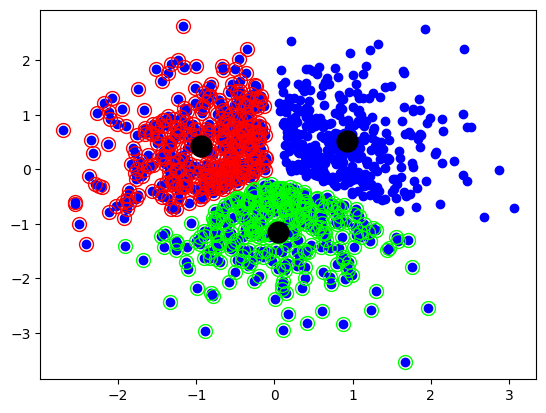

In [13]:
init_centers=c
kmeans=KMeans(n_clusters=3,init=init_centers,n_init=1,max_iter=1)
kmeans.fit(data)
y=kmeans.predict(data)

#modify each point in the data so each point moves 1% closer to its assigned cluster center
newdata=np.vstack([data[y==0]*0.9+0.1*init_centers[0], 
data[y==1]*0.9+0.1*init_centers[1], 
data[y==2]*0.9+0.1*init_centers[2]])

init_centers=np.array([[-1,0],[0,0], [1, 0]])

#run_kmeans_stepwise(Xg,Yg,init_centers,kpp=True)

c = run_kmeans_stepwise(newdata,init_centers,kpp=False)




We can observe the segmentation of data

(d)

step 0 score 450.85550749378376
code book [[-0.84666454  0.01534039]
 [-0.00884239 -0.02402534]
 [ 0.83141006  0.02188524]]
step 1 score 446.01230582545213
code book [[-0.80105582  0.03187107]
 [-0.01783667 -0.05411455]
 [ 0.7752352   0.05283838]]
step 2 score 429.84474153550264
code book [[-0.78009056  0.10035017]
 [-0.02929439 -0.13117916]
 [ 0.74051447  0.10640839]]
step 3 score 381.5947585441645
code book [[-0.73974055  0.23133374]
 [-0.04055583 -0.29414717]
 [ 0.69456711  0.20578588]]
step 4 score 340.76677457919305
code book [[-0.65407926  0.31298893]
 [-0.02694638 -0.51279064]
 [ 0.61994906  0.30639159]]
step 5 score 333.8406812126609
code book [[-0.60664545  0.31237526]
 [-0.00433244 -0.61216166]
 [ 0.58095865  0.33591065]]
step 6 score 332.47512232706015
code book [[-0.58780613  0.29362853]
 [ 0.00177599 -0.65413193]
 [ 0.57249461  0.32626309]]
step 7 score 332.0111438710862
code book [[-0.5804373   0.27811152]
 [ 0.01185348 -0.67731846]
 [ 0.56799538  0.32128737]]
step 8 scor

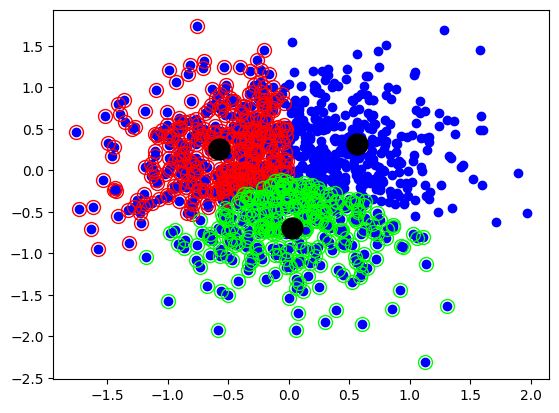

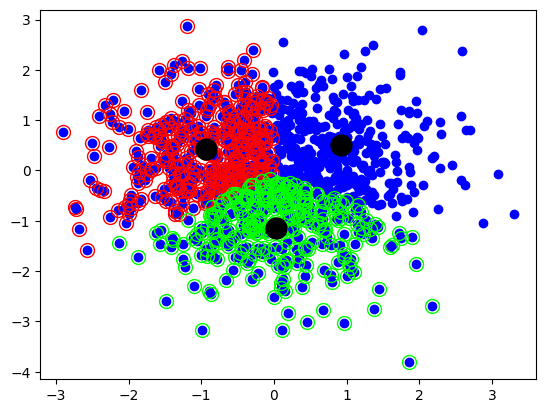

In [428]:
#let us modify the data 50 times, keeping in mind that we already have modified one time previously.

for i in range(49):
    newdata=np.vstack([newdata[y==0]*0.99+0.01*init_centers[0], 
    newdata[y==1]*0.99+0.01*init_centers[1], 
    newdata[y==2]*0.99+0.01*init_centers[2]])

init_centers=np.array([[-1,0],[0,0], [1, 0]])
c = run_kmeans_stepwise(newdata,init_centers,kpp=False)
show_clusters(kmeans,data)
#As we observe here, we have a "zoom in" effect. Original population got closer to the center, while keeping the same relative distance with one another.


Problem 5 (a)

In [429]:
import json
speeches=[]
with open('speeches.json') as f:
    for line in f:
        speeches.append(json.loads(line))
sentences = [None] * len(speeches)

In [430]:
for i in range(len(speeches)):
    pattern = re.compile(r'([A-Z][^\.?]*[\.?]+)')
    sentences[i] = pattern.findall(speeches[i].get('text'))

(b)

In [431]:
#construct the mean sentence length in words for each year
lengths = [0] * len(sentences)
for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        lengths[i] = lengths[i]+len(sentences[i][j].split())
for i in range(len(sentences)):
    lengths[i] = lengths[i]/len(sentences[i])
max_value = max(lengths)
max_index = lengths.index(max_value)
print(speeches[max_index].get('president'))
# Jimmy Carter has the longest sentences on average.
min_value = min(lengths)
min_index = lengths.index(min_value)
print(speeches[min_index].get('president'))
#John Adams has the shortest sentences on average.

print(np.percentile(lengths, 25))
print(np.percentile(lengths, 50))
print(np.percentile(lengths, 75))
#There are many ways to caclulate this. In this case, median, 25%, 75% quantiles are 172.25, 256, and 365,75.


James Madison
George W. Bush
21.465960533603024
29.720779821821125
35.50537704575709


In [432]:
#let us look into maximum sentence.
maxsent = sentences[0][0]
maxcount = len(re.findall(r'\w+', sentences[0][0]))
for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        if maxcount < len(re.findall(r'\w+', sentences[i][j])):
            maxcount = len(re.findall(r'\w+', sentences[i][j]))
            maxsent = sentences[i][j]
#maximum sentence is as follows.
print(maxsent)

#Now look into minimum sentence.
minsent = sentences[0][0]
mincount = len(re.findall(r'\w+', sentences[0][0]))
for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        if mincount > len(re.findall(r'\w+', sentences[i][j])) and len(re.findall(r'\w+', sentences[i][j]))>2:
            mincount = len(re.findall(r'\w+', sentences[i][j]))
            minsent = sentences[i][j]
#Admittedly our parsing of the address is not perfect, so we arbitrarily say that the length should be at least 2. Minimum sentence is as follows.
print(minsent)

Over the past 48 months, clear progress has been made in solving the challenges we found in January of 1977:  

 almost all of our comprehensive energy program have been enacted, and the Department of Energy has been established to administer the program;  

 confidence in the government's integrity has been restored, and respect for the government's openness and fairness has been renewed;  

 the government has been made more effective and efficient: the Civil Service system was completely reformed for the first time this century; 14 reorganization initiatives have been proposed to the Congress, approved, and implemented; two new Cabinet departments have been created to consolidate and streamline the government's handling of energy and education problems; inspectors general have been placed in each Cabinet department to combat fraud, waste and other abuses; the regulatory process has been reformed through creation of the Regulatory Council, implementation of Executive Order 12044 a

(c)

In [433]:
import collections

years = [None] * len(speeches)
for i in range(len(speeches)):
    years[i] = speeches[i].get('year')
    #we need to change string into number
for i in range(len(years)):
    years[i] = int(years[i])

#now record the count of sentences in each year
counts = [None] * len(speeches)
for i in range(len(speeches)):
    counts[i] = len(sentences[i])

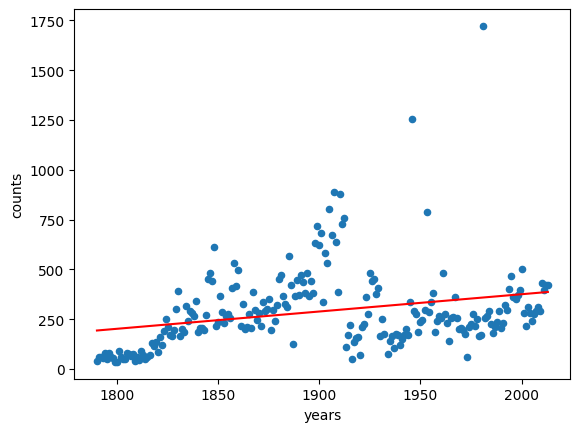

In [434]:
#number of sentence for each years
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'years':years,'counts':counts})
df.sort_values('years')
d = df.groupby(['years']).sum()
d['years']=d.index
d.plot(kind = 'scatter', x='years', y='counts')

#convert years and counts into lists
y=d['years'].tolist()
c=d['counts'].tolist()

#use the formula we get for the regression in order to get the slope and intercept term
np.mean(y)
np.mean(c)
beta1=(np.dot(y-np.mean(y),c-np.mean(c)))/(np.dot(y-np.mean(y),y-np.mean(y)))
beta0=np.mean(c)-np.mean(y)*beta1

x=np.linspace(1790,2013,10000)
y=beta0+beta1*x
plt.plot(x, y, 'r')
plt.show()

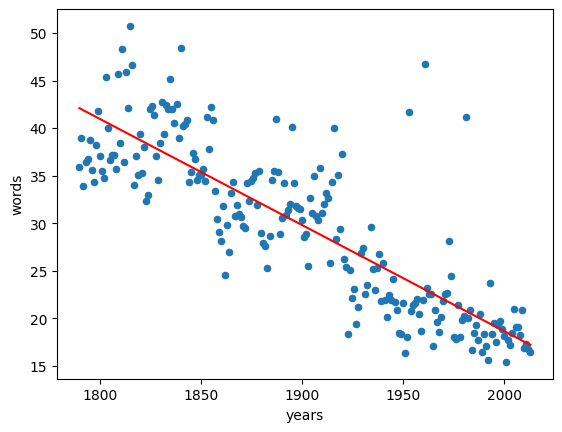

In [435]:
#construct the mean sentence length in words for each year
words = [0] * len(sentences)
for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        words[i] = words[i]+len(sentences[i][j].split())
for i in range(len(sentences)):
    words[i] = words[i]/len(sentences[i])

df2 = pd.DataFrame({'years':years,'words':words})
df2.sort_values('years')
d2 = df2.groupby(['years']).sum()
d2['years']=d2.index
d2.plot(kind = 'scatter', x='years', y='words')

#convert years and counts into lists
y=d2['years'].tolist()
w=d2['words'].tolist()

#use the formula we get for the regression in order to get the slope and intercept term
betaa1=(np.dot(y-np.mean(y),w-np.mean(w)))/(np.dot(y-np.mean(y),y-np.mean(y)))
betaa0=np.mean(w)-np.mean(y)*betaa1

x1=np.linspace(1790,2013,10000)
y1=betaa0+betaa1*x1
plt.plot(x1, y1, 'r')
plt.show()


(d)

In [ ]:
We could add some categorical term T_i, i.e.,
$Y_i=beta_0+beta_T*T_i+(beta_X+beta_X:T*T_i)X_i$+noise where T_i=0 or 1 depending on X.
The obvious advantage of using separate group is that we can compare two periods for example by observing different slope. If we do not have meaningful difference between two periods, it is better to have a simpler model without categorical term.

1226

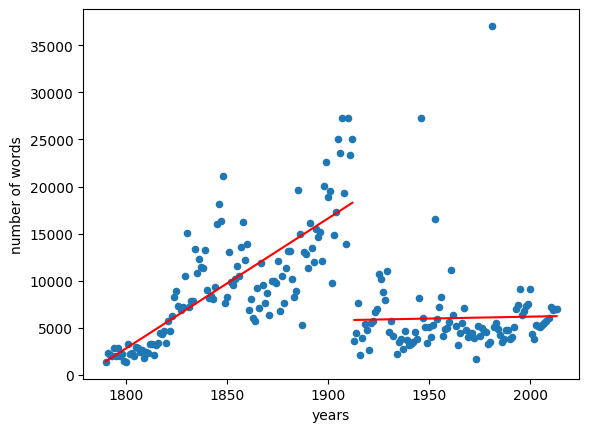

In [436]:
#let us find the number of words in each year
nwords = [0] * len(sentences)
for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        nwords[i] = nwords[i]+len(sentences[i][j].split())
df3 = pd.DataFrame({'years':years,'number of words':nwords})
df3.sort_values('years')
d3 = df3.groupby(['years']).sum()
d3['years']=d3.index
d3.plot(kind = 'scatter', x='years', y='number of words')

#convert years before 1913 and the corresponding number of words into lists
y=d3['years'].tolist()[0:123]
ww=d3['number of words'].tolist()[0:123]

#use the formula we get for the regression in order to get the slope and intercept term
betaaa1=(np.dot(y-np.mean(y),ww-np.mean(ww)))/(np.dot(y-np.mean(y),y-np.mean(y)))
betaaa0=np.mean(ww)-np.mean(y)*betaaa1

x1=np.linspace(1790,1912,10000)
y1=betaaa0+betaaa1*x1
plt.plot(x1, y1, 'r')

#convert years before 1913 and the corresponding number of words into lists
y=d3['years'].tolist()[124:]
www=d3['number of words'].tolist()[124:]

#use the formula we get for the regression in order to get the slope and intercept term
betaaaa1=(np.dot(y-np.mean(y),www-np.mean(www)))/(np.dot(y-np.mean(y),y-np.mean(y)))
betaaaa0=np.mean(www)-np.mean(y)*betaaaa1

x2=np.linspace(1913,2013,10000)
y2=betaaaa0+betaaaa1*x2
plt.plot(x2, y2, 'r')
plt.show()

#the number of words in the address gradually increased until 1912.
#afterward, it dropped significantly where it stabilized until 2013.
#This is because the address was sent to Congress to be read by a clerk until 1913 when in-person address to Congress has been made every year since.